In [1]:
### Plotting SimplePG Smallsoccer results ###

from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import csv

import numpy as np
import pandas as pd
from pandas import DataFrame as df

sns.set()

In [2]:
def df_data(algo, epoch, batch_size, lr):
    fname = algo + "-smallsoccer-0_epochs" + str(epoch) + "_batch_size" + str(batch_size) + "_lr" + str(lr) + "_.csv"
    file_name = "smallsoccer0-gridsearch/"+ fname
    simple_data = pd.read_csv(file_name)
    return simple_data


def grad_norms_to_float(grad_array):
    grad_array = grad_array.strip('][').split(', ')
    for i in np.arange(0,len(grad_array)):
        grad_array[i] = float(grad_array[i])
    root_sum_square = np.sqrt(sum([i**2 for i in grad_array]))
    return grad_array, root_sum_square

def raw_df(algos, epochs, batch_sizes, lrs):
    raw_df = df({'Algo': [], 'Epochs': [], 'Batch Size': [], 'Learning Rate': [], 'Epoch': [],
                 'agent0_grad_norms': [], 'agent0_gn_rss': [], 'agent0_avg_rets': [],
                 'agent0_avg_lens': [], 'agent0_loss': [], 'agent1_grad_norms': [], 'agent1_gn_rss': [],
                 'agent1_avg_rets': [], 'agent1_avg_lens': [], 'agent1_loss': []})
    for algo in algos:
        for epoch in epochs:
            for batch in batch_sizes:
                for lr in lrs:
                    data = df_data(algo, epoch, batch, lr)
                    for idx in np.arange(0,len(data.index)):
                        ag0_gn = data.at[idx,'agent0_grad_norms']
                        ag0_gn, ag0_gn_rss = grad_norms_to_float(ag0_gn)
                        ag0_ar = data.at[idx,'agent0_avg_rets']
                        ag0_al = data.at[idx,'agent0_avg_lens']
                        ag0_l = data.at[idx,'agent0_loss']
                        ag1_gn = data.at[idx,'agent1_grad_norms']
                        ag1_gn, ag1_gn_rss = grad_norms_to_float(ag1_gn)
                        ag1_ar = data.at[idx,'agent1_avg_rets']
                        ag1_al = data.at[idx,'agent1_avg_lens']
                        ag1_l = data.at[idx,'agent1_loss']
                        raw_df.loc[len(raw_df.index)] = [algo, epoch, batch, lr, idx,
                                                         ag0_gn, ag0_gn_rss, ag0_ar, ag0_al, ag0_l,
                                                         ag1_gn, ag1_gn_rss, ag1_ar, ag1_al, ag1_l] 
    return raw_df

In [3]:
# Find mode when converging returns, and return x,y coord
def converge_find(data):
    y = Counter(data).most_common(1)[0][0]
    for i in np.arange(0,len(data)):
        ytest = data[i]
        if (y == ytest):
            x = i
            break
    return x,y

# Given what is graphed return an appropriate xlabel (for now only epoch?)
def get_xlabel():
    xlabel = 'Epochs'
    return xlabel

# Given what is graphed return an appropriate ylabel
def get_ylabel(y_df):
    columns = y_df.columns
    if ('avg_rets' in y_df.columns[0]):
        ylabel = 'Average Returns'
    elif ('loss' in y_df.columns[0]):
        ylabel = 'Loss'
    elif ('grad_norms' in y_df.columns[0]):
        ylabel = 'Gradient Norms'
    else:
        ylabel = 'Not Found'
    return ylabel

# Given what is graphed return an appropriate title
def get_title(y_df, algo, epoch, batch_size, lr, nnsize):
    title = algo + ' agent0 vs agent1 ' + get_ylabel(y_df) + ' (ep =' + str(epoch) + ' bs = ' + str(batch_size) + ' lr = ' + str(lr) + 'nnsize = ' + nnsize + ')'
    return title
    
# Given string list of gradient norms, return float list of grad_norms and RSS for grads         
def grad_norms_to_float(grad_array):
    grad_array = grad_array.strip('][').split(', ')
    for i in np.arange(0,len(grad_array)):
        grad_array[i] = float(grad_array[i])
    root_sum_square = np.sqrt(sum([i**2 for i in grad_array]))
    return grad_array, root_sum_square


In [4]:
def sns_data(algo, epoch, batch_size, lr):
    fname = algo + "-smallsoccer-0_epochs" + str(epoch) + "_batch_size" + str(batch_size) + "_lr" + str(lr) + "_.csv"
    file_name = "smallsoccer0-gridsearch/"+ fname
    sns_data = sns.load_dataset(file_name)
    return sns_data

In [5]:
sd = df_data("SimplePG", 50, 100, 0.1)
ss_algos = ["SimplePG"]
#ss_batch_size = [100, 500, 1000, 5000]
ss_epochs = [50, 100, 500]
ss_batch_size = [100, 500, 1000]
ss_lrs = [0.1, 0.01, 0.001, 0.0001]
sd_full = raw_df(ss_algos, ss_epochs ,ss_batch_size ,ss_lrs)
sd_rets = sd['agent0_avg_rets']
sd_nonzero = sd[(sd['agent0_avg_rets'] != 0.0)]
sd_full_nonzero = sd_full[(sd_full['agent0_avg_rets'] != 0.0)]
#snsd = sns_data("SimplePG", 50, 100, 0.1)

#print(sd_nonzero)

#def create_heatmap_SimplePG()
#for col in sd.columns:
    #print(col)
    


/Users/ryanching/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


/Users/ryanching/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: set_theme() got an unexpected keyword argument 'xscale'

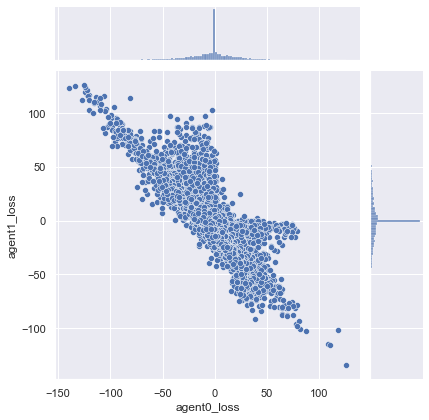

In [9]:
#sd_full_nonzero.plot()

lr_full = sd_full_nonzero['Learning Rate']
batch_full = sd_full_nonzero['Batch Size']
epoch_full = sd_full_nonzero['Epochs']

rets_0 = sd_full_nonzero['agent0_avg_rets']
rets_1 = sd_full_nonzero['agent1_avg_rets']

lens_0 = sd_full_nonzero['agent0_avg_lens']
lens_1 = sd_full_nonzero['agent1_avg_lens']

loss_0 = sd_full_nonzero['agent0_loss']
loss_1 = sd_full_nonzero['agent1_loss']

sns.jointplot(loss_0, loss_1)
sns.set(xscale="log", yscale="log")
plt.show()

sns.jointplot(rets_0, loss_0)
plt.show()

sns.jointplot(loss_0, loss_1)
plt.show()

sns.boxplot(x = lr_full, y = rets_0)
plt.show()

sns.boxplot(x = batch_full, y = rets_0)
plt.show()

sns.boxplot(x = epoch_full, y = rets_0)
plt.show()